# Model training

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, classification_report
from sklearn.metrics import confusion_matrix, classification_report


In [17]:
df = pd.read_csv("../data/prediction.csv", index_col=0, parse_dates=True)

In [18]:
df.head()

,rsi_1000,rsi_rate_1000,rsi_10000,rsi_rate_10000,rsi_100000,rsi_rate_100000,arn_down_1000,arn_1000,arn_up_1000,arn_rate_1000,...,fi_1000,fi_rate_1000,fi_10000,fi_rate_10000,fi_100000,fi_rate_100000,vol,sc,random,target
2021-04-23 07:31:43.163,48.324584,-0.001072,49.331256,-0.000011,49.752472,-0.000003,100.0,-29.2,70.8,0.0509,...,-4.134097,-0.001957,-2.901251,0.000015,-2.141801,-0.000013,0.020325,0.045187,0.789564,0
2021-04-23 08:09:50.155,48.308277,0.000047,49.205838,-0.000009,49.730952,-0.000003,100.0,-85.4,14.6,-0.0257,...,-3.788638,0.000120,-3.111535,0.000006,-2.225652,-0.000060,0.020988,0.015044,0.413377,1
2021-04-23 08:31:29.099,50.602470,0.002092,49.466639,-0.000002,49.757389,-0.000003,44.0,56.0,100.0,0.1444,...,3.187180,0.006638,-2.620496,0.000025,-2.139148,-0.000023,0.020507,-0.059667,0.013387,0
2021-04-23 09:40:37.273,48.525016,-0.001932,49.351173,0.000021,49.741186,-0.000003,100.0,-57.2,42.8,-0.1270,...,-4.005369,-0.006824,-2.840003,0.000059,-2.188784,-0.000021,0.019150,0.039320,0.036982,1
2021-04-23 10:06:50.048,51.318671,0.000154,49.639684,0.000035,49.772582,-0.000003,59.0,-57.2,1.8,-0.1325,...,3.902416,0.000339,-1.724140,0.000156,-2.053822,-0.000028,0.018793,0.094303,0.266360,1


In [19]:
X = df.drop(["target"], axis=1)
X.head(3)

,rsi_1000,rsi_rate_1000,rsi_10000,rsi_rate_10000,rsi_100000,rsi_rate_100000,arn_down_1000,arn_1000,arn_up_1000,arn_rate_1000,...,bb_wband_rate_100000,fi_1000,fi_rate_1000,fi_10000,fi_rate_10000,fi_100000,fi_rate_100000,vol,sc,random
2021-04-23 07:31:43.163,48.324584,-0.001072,49.331256,-0.000011,49.752472,-0.000003,100.0,-29.2,70.8,0.0509,...,0.000082,-4.134097,-0.001957,-2.901251,0.000015,-2.141801,-0.000013,0.020325,0.045187,0.789564
2021-04-23 08:09:50.155,48.308277,0.000047,49.205838,-0.000009,49.730952,-0.000003,100.0,-85.4,14.6,-0.0257,...,0.000086,-3.788638,0.000120,-3.111535,0.000006,-2.225652,-0.000060,0.020988,0.015044,0.413377
2021-04-23 08:31:29.099,50.602470,0.002092,49.466639,-0.000002,49.757389,-0.000003,44.0,56.0,100.0,0.1444,...,0.000087,3.187180,0.006638,-2.620496,0.000025,-2.139148,-0.000023,0.020507,-0.059667,0.013387


In [20]:
y = df.target
y

2021-04-23 07:31:43.163    0
2021-04-23 08:09:50.155    1
2021-04-23 08:31:29.099    0
2021-04-23 09:40:37.273    1
2021-04-23 10:06:50.048    1
                          ..
2021-06-19 04:32:03.276    1
2021-06-19 06:30:57.226    1
2021-06-19 12:07:09.748    0
2021-06-19 12:48:14.298    1
2021-06-19 14:36:28.808    0
Name: target, Length: 610, dtype: int64

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    shuffle=False)

In [22]:
n_estimators = 10000
model = RandomForestClassifier(max_depth=2, n_estimators=n_estimators,
                            criterion='entropy')
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=2, n_estimators=10000)

Text(-1.5, 0.5, 'Predicted label')

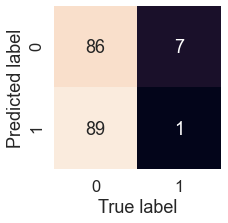

In [23]:
y_preds = model.predict(X_test)	

sns.set(font_scale = 1.5)
fig, ax = plt.subplots(figsize=(3, 3))
ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                 annot=True,
                 cbar=False,
                 fmt='d')
plt.xlabel("True label")
plt.ylabel("Predicted label")

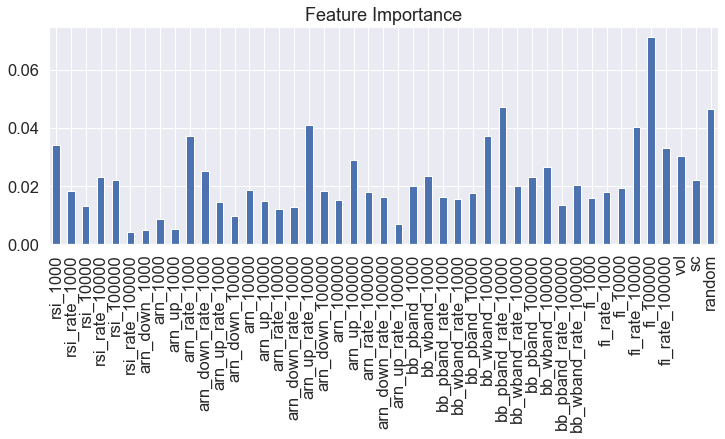

In [24]:
feature_dict = dict(zip(X_train.columns, list(model.feature_importances_)))
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False, figsize=(12, 4));

In [25]:
y_pred_rf = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred_rf)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.92      0.64        93
           1       0.12      0.01      0.02        90

    accuracy                           0.48       183
   macro avg       0.31      0.47      0.33       183
weighted avg       0.31      0.48      0.34       183



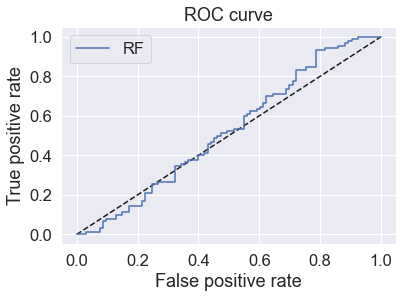

In [26]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

## Plotting

In [27]:
prices = pd.read_csv("../data/BTCUSDT-volume-bars.csv", index_col=0, parse_dates=True)

In [28]:
df.target

2021-04-23 07:31:43.163    0
2021-04-23 08:09:50.155    1
2021-04-23 08:31:29.099    0
2021-04-23 09:40:37.273    1
2021-04-23 10:06:50.048    1
                          ..
2021-06-19 04:32:03.276    1
2021-06-19 06:30:57.226    1
2021-06-19 12:07:09.748    0
2021-06-19 12:48:14.298    1
2021-06-19 14:36:28.808    0
Name: target, Length: 610, dtype: int64

In [29]:
plot = df[-len(y_pred):].copy()
plot["close"] = prices.reindex(plot.index).close
plot["up"] = list(map(lambda x, c: c if x==1 else None, y_pred, plot.close))
plot["down"] = list(map(lambda x, c: c if x==0 else None, y_pred, plot.close))


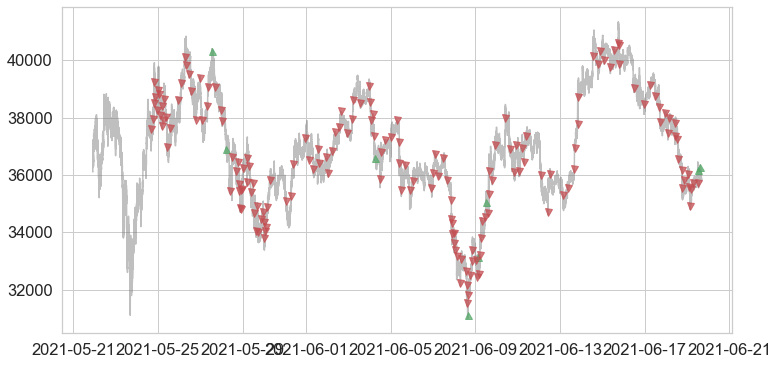

In [30]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(prices.close[-500000:], alpha=.5, color="gray")

ax.plot(plot.up, marker='^', markersize=7,
                     alpha=0.75, label='upcross', color='g', linewidth=0)

ax.plot(plot.down, marker='v', markersize=7,
                     alpha=0.75, label='upcross', color='r', linewidth=0)